Fuente spotify api

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi
sns.reset_defaults()

plt.style.use('https://raw.githubusercontent.com/datatrooper/instatrooper/master/styles/bluetrooper.mplstyle')
datatrooper_palette = [
    "#E6D3AD",
    "#967B4F",
    "#46493D",
    "#839DA5",
    "#9FADAD",
    "#2B4144",
    "#986E37"
]


In [2]:
df = pd.read_csv("../../../data/audio_features.csv")

In [3]:
df = df.rename(columns={
    'popularity' : "Popularidad",
    'danceability' : "Bailabilidad",
    'energy' : "Energía",
    'speechiness' : "Letra",
    'acousticness' : "Acústica",
    'instrumentalness' : "Instrumentalidad",
    'liveness' : "Vitalidad",
    'valence' : "Emoción"
})

In [4]:
df

,name,artist,Popularidad,Bailabilidad,Energía,loudness,mode,Letra,Acústica,Instrumentalidad,Vitalidad,Emoción,tempo
0,La Vida Es Un Carnaval,['Celia Cruz'],66,81.3,70.1,-6.508,0,7.01,48.90,0.116000,29.40,85.5,104.019
1,I Took A Pill In Ibiza - Seeb Remix,"['Mike Posner', 'Seeb']",72,66.3,71.3,-6.647,0,11.20,3.53,0.000768,8.43,69.0,101.965
2,Not Afraid,['Eminem'],78,85.5,95.4,-1.190,0,26.40,52.90,0.000000,20.50,66.8,114.635
3,Shape of You,['Ed Sheeran'],85,82.5,65.2,-3.183,0,8.02,58.10,0.000000,9.31,93.1,95.977
4,"Happy - From ""Despicable Me 2""",['Pharrell Williams'],79,64.7,82.2,-4.662,0,18.30,21.90,0.000000,9.08,96.2,160.019
5,Over the Rainbow,"[""Israel Kamakawiwo'ole""]",69,67.1,15.3,-13.569,1,4.04,91.20,0.005530,7.71,65.8,85.600


In [5]:
df.loc[0].drop('name').values.flatten().tolist()

["['Celia Cruz']",
 66,
 81.3,
 70.1,
 -6.507999999999999,
 0,
 7.01,
 48.9,
 0.11599999999999999,
 29.4,
 85.5,
 104.01899999999999]

La Vida Es Un Carnaval


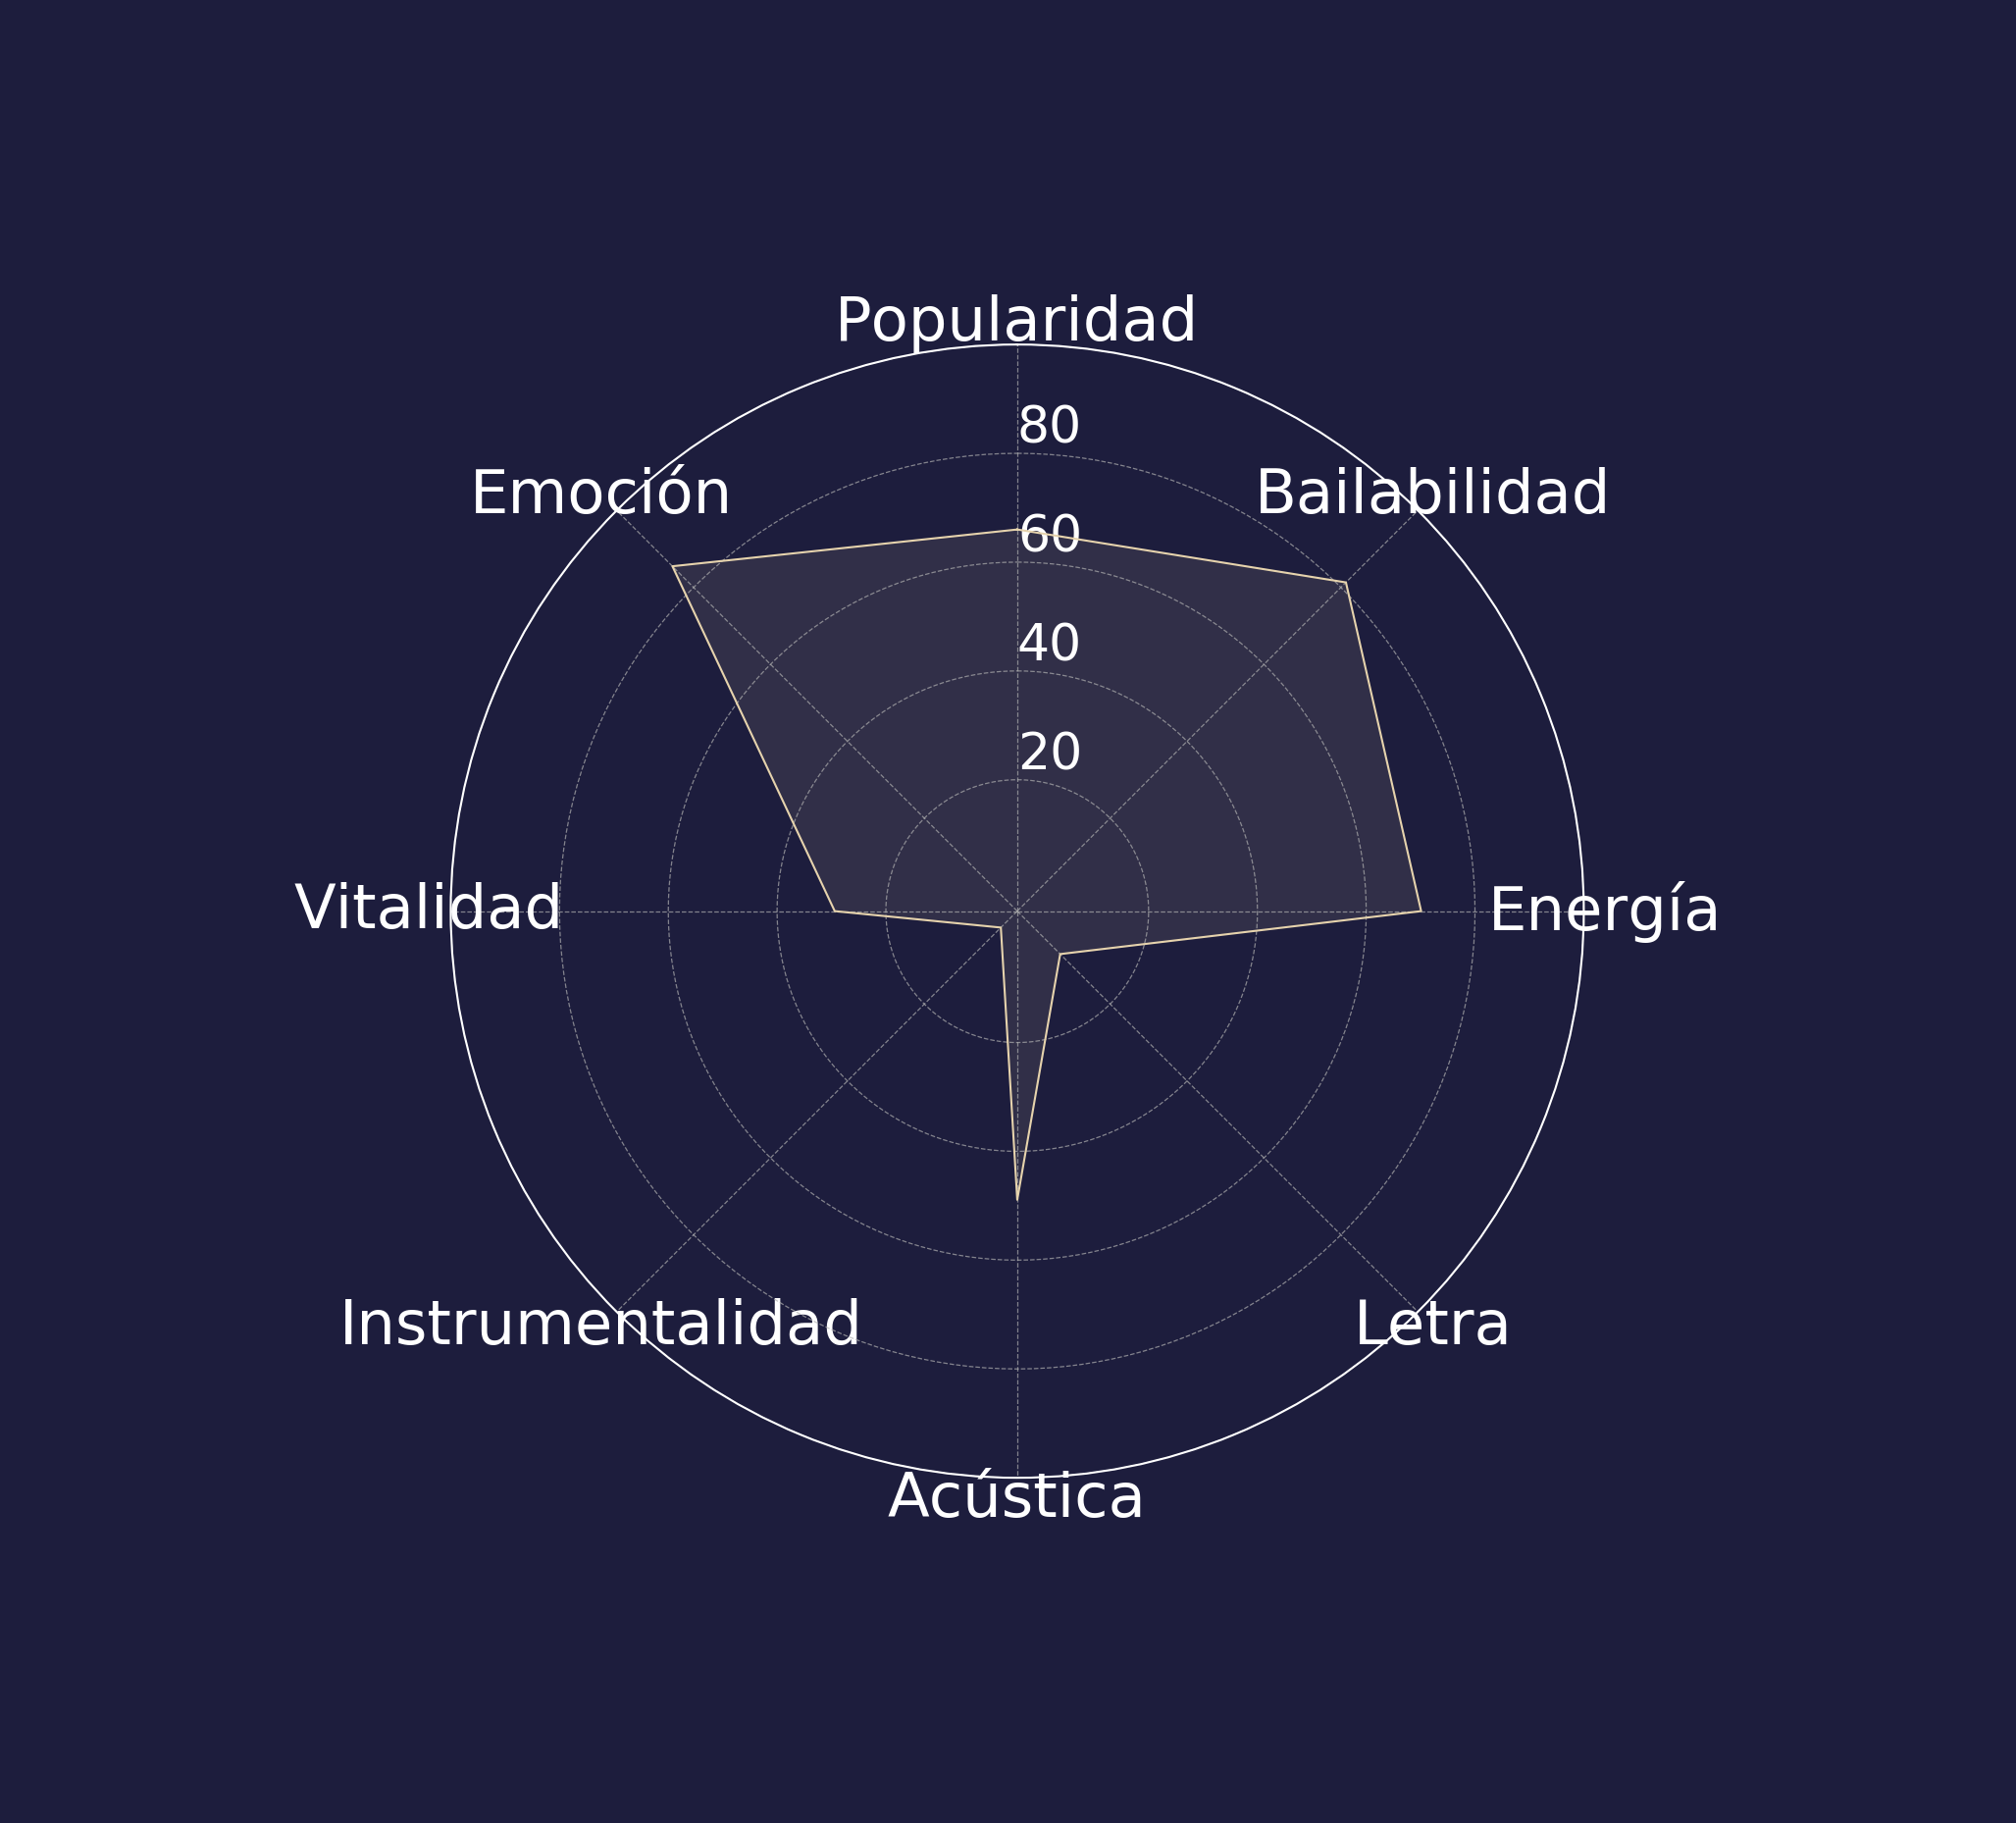

I Took A Pill In Ibiza - Seeb Remix


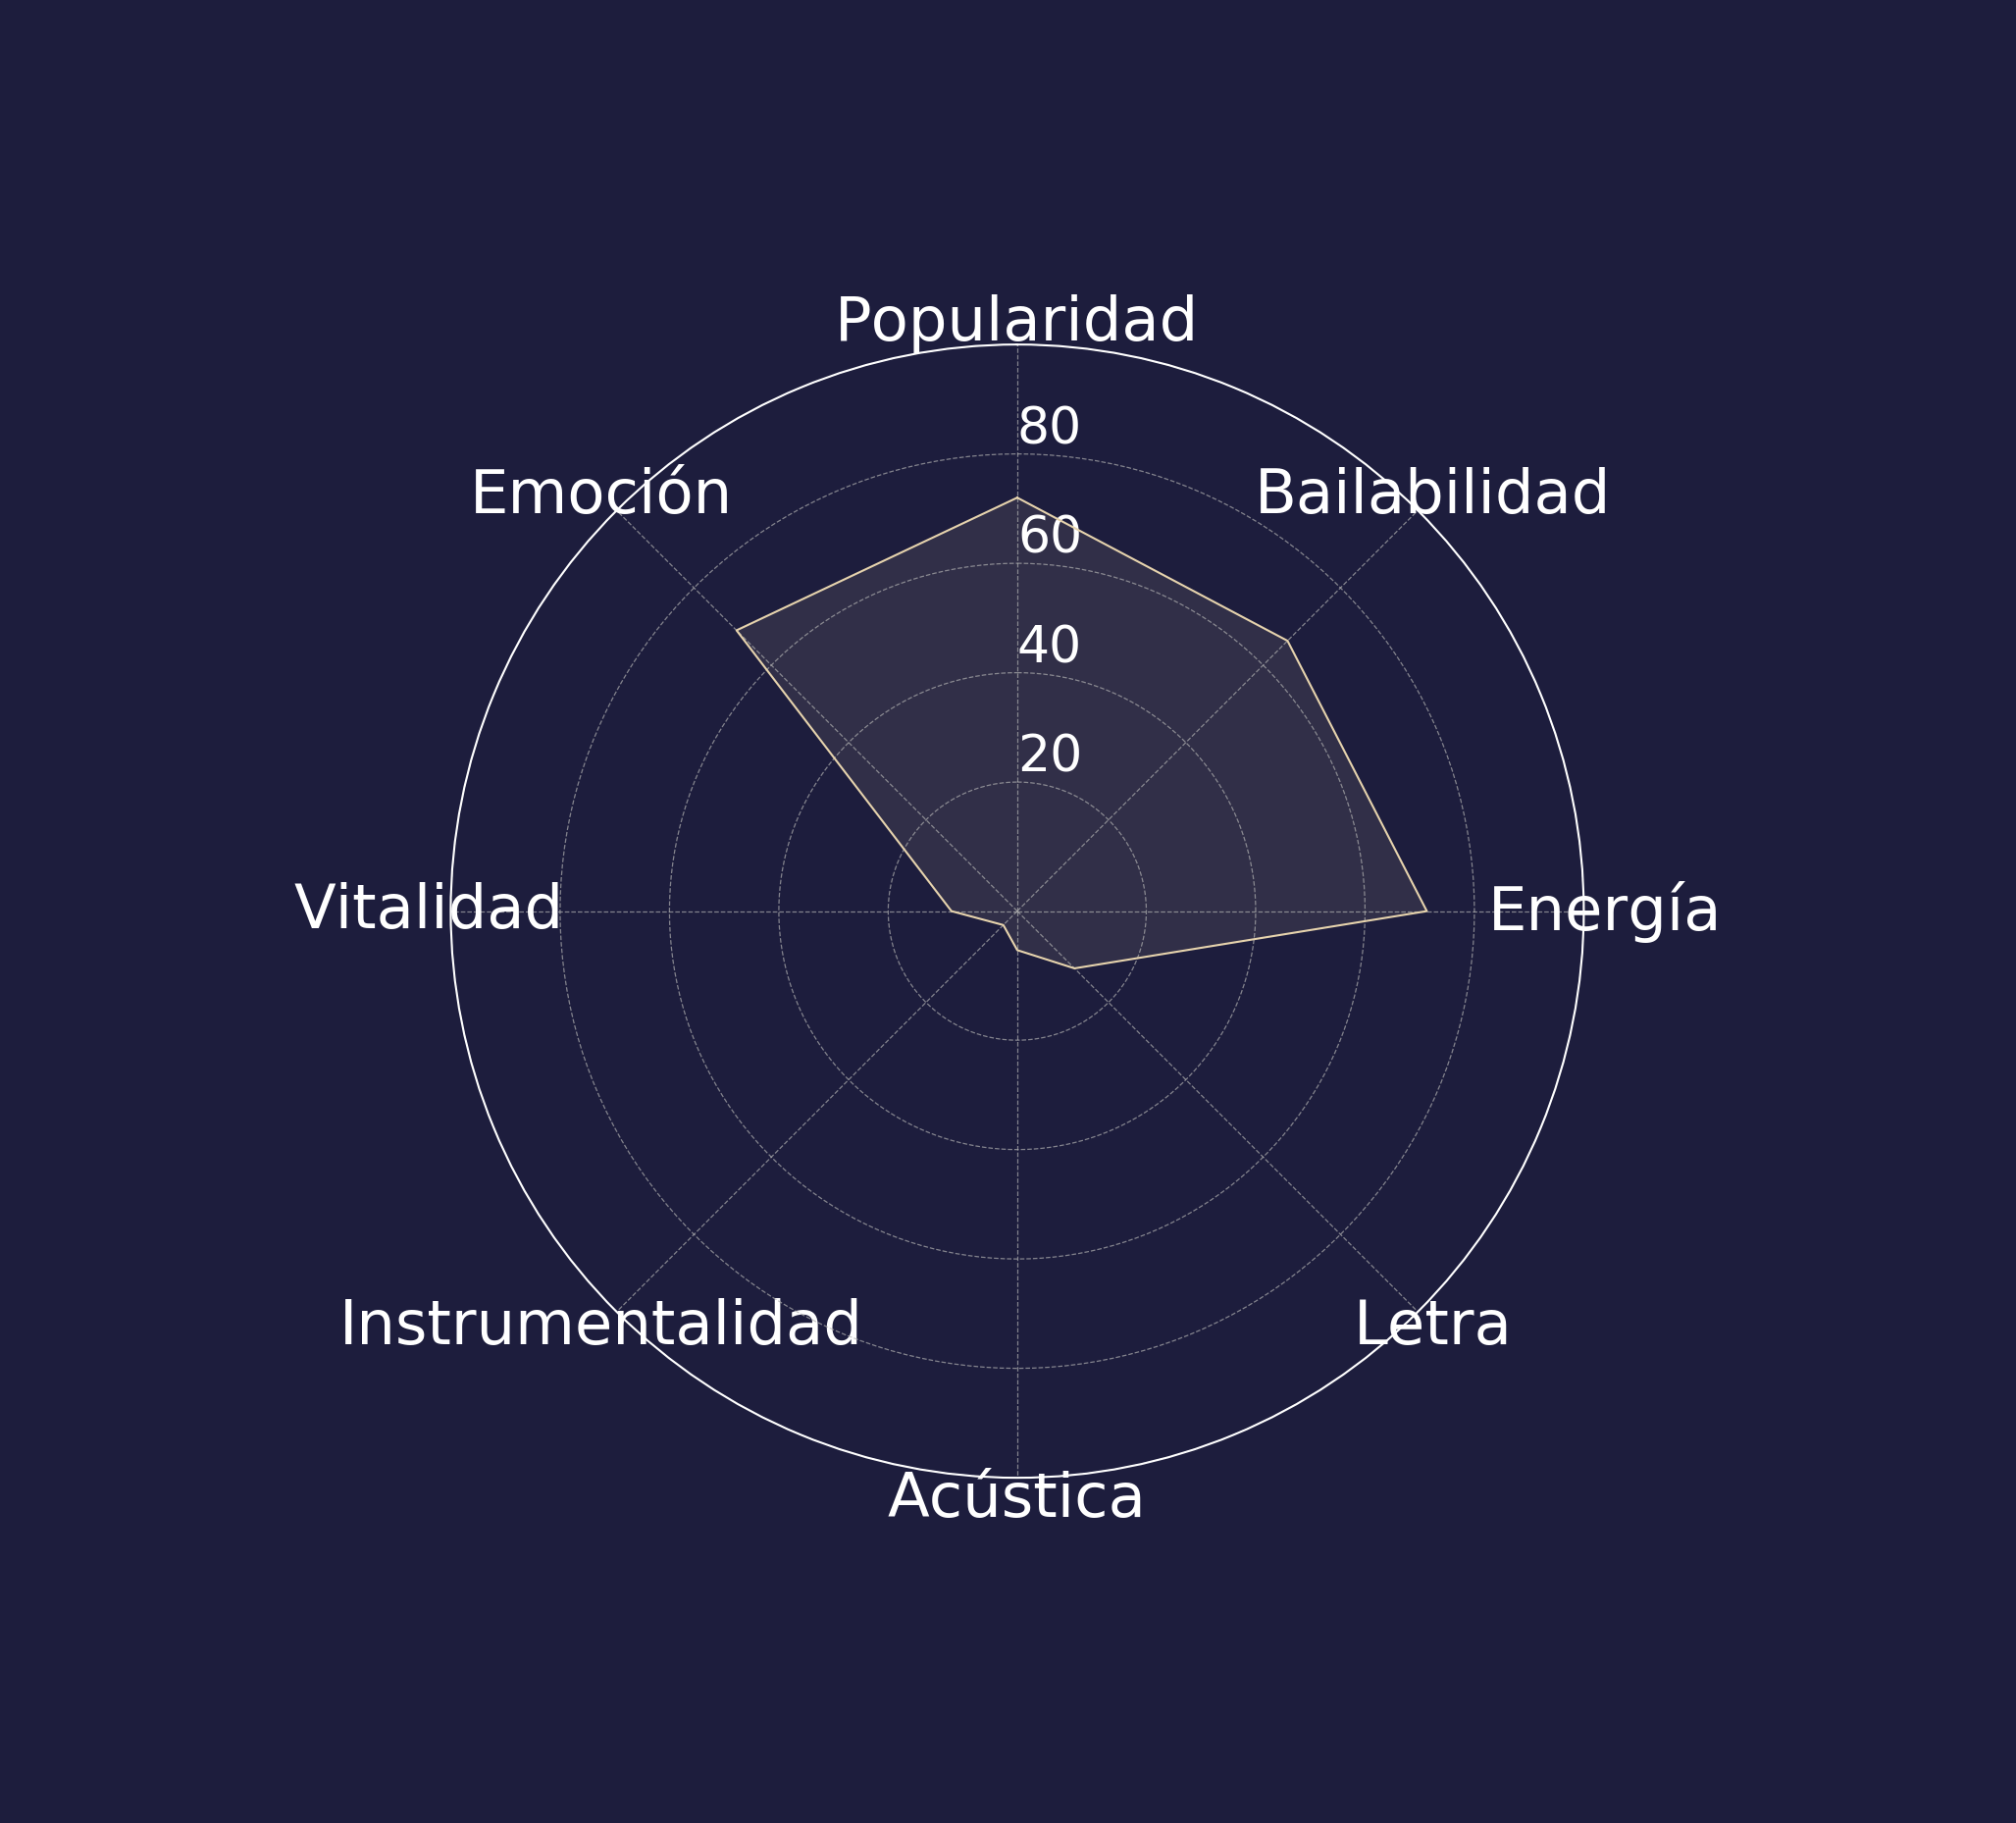

Not Afraid


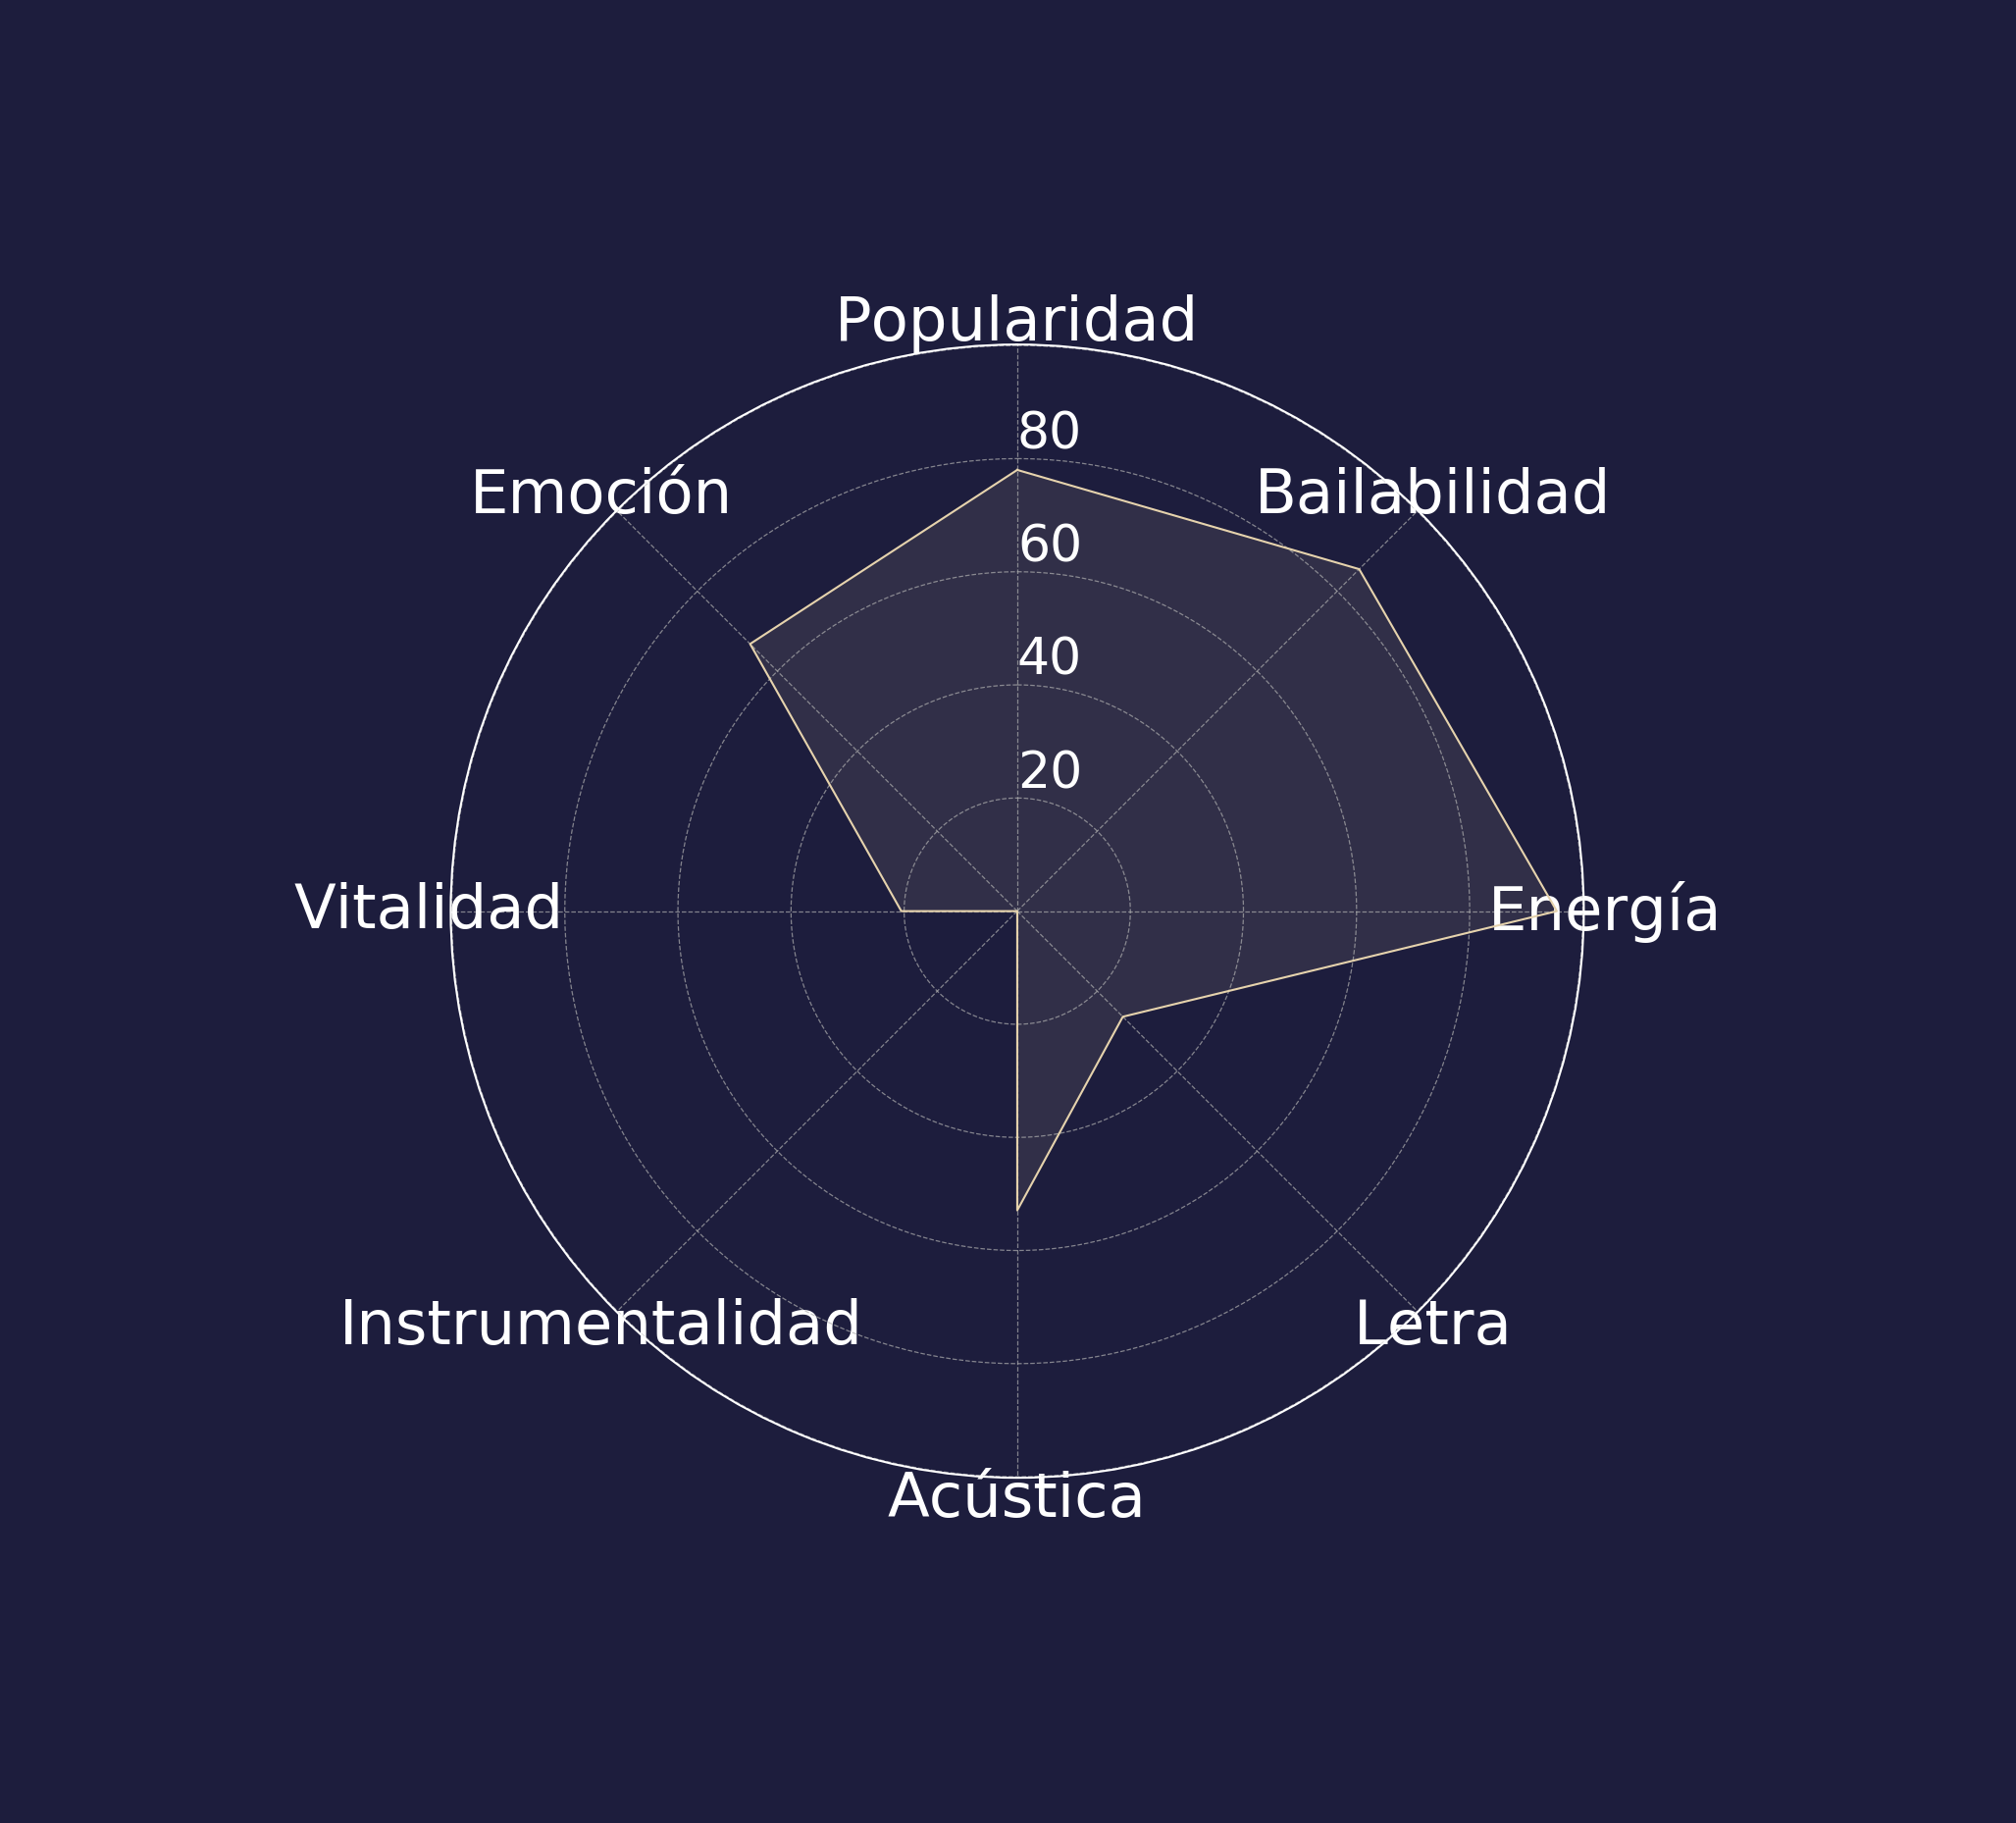

Shape of You


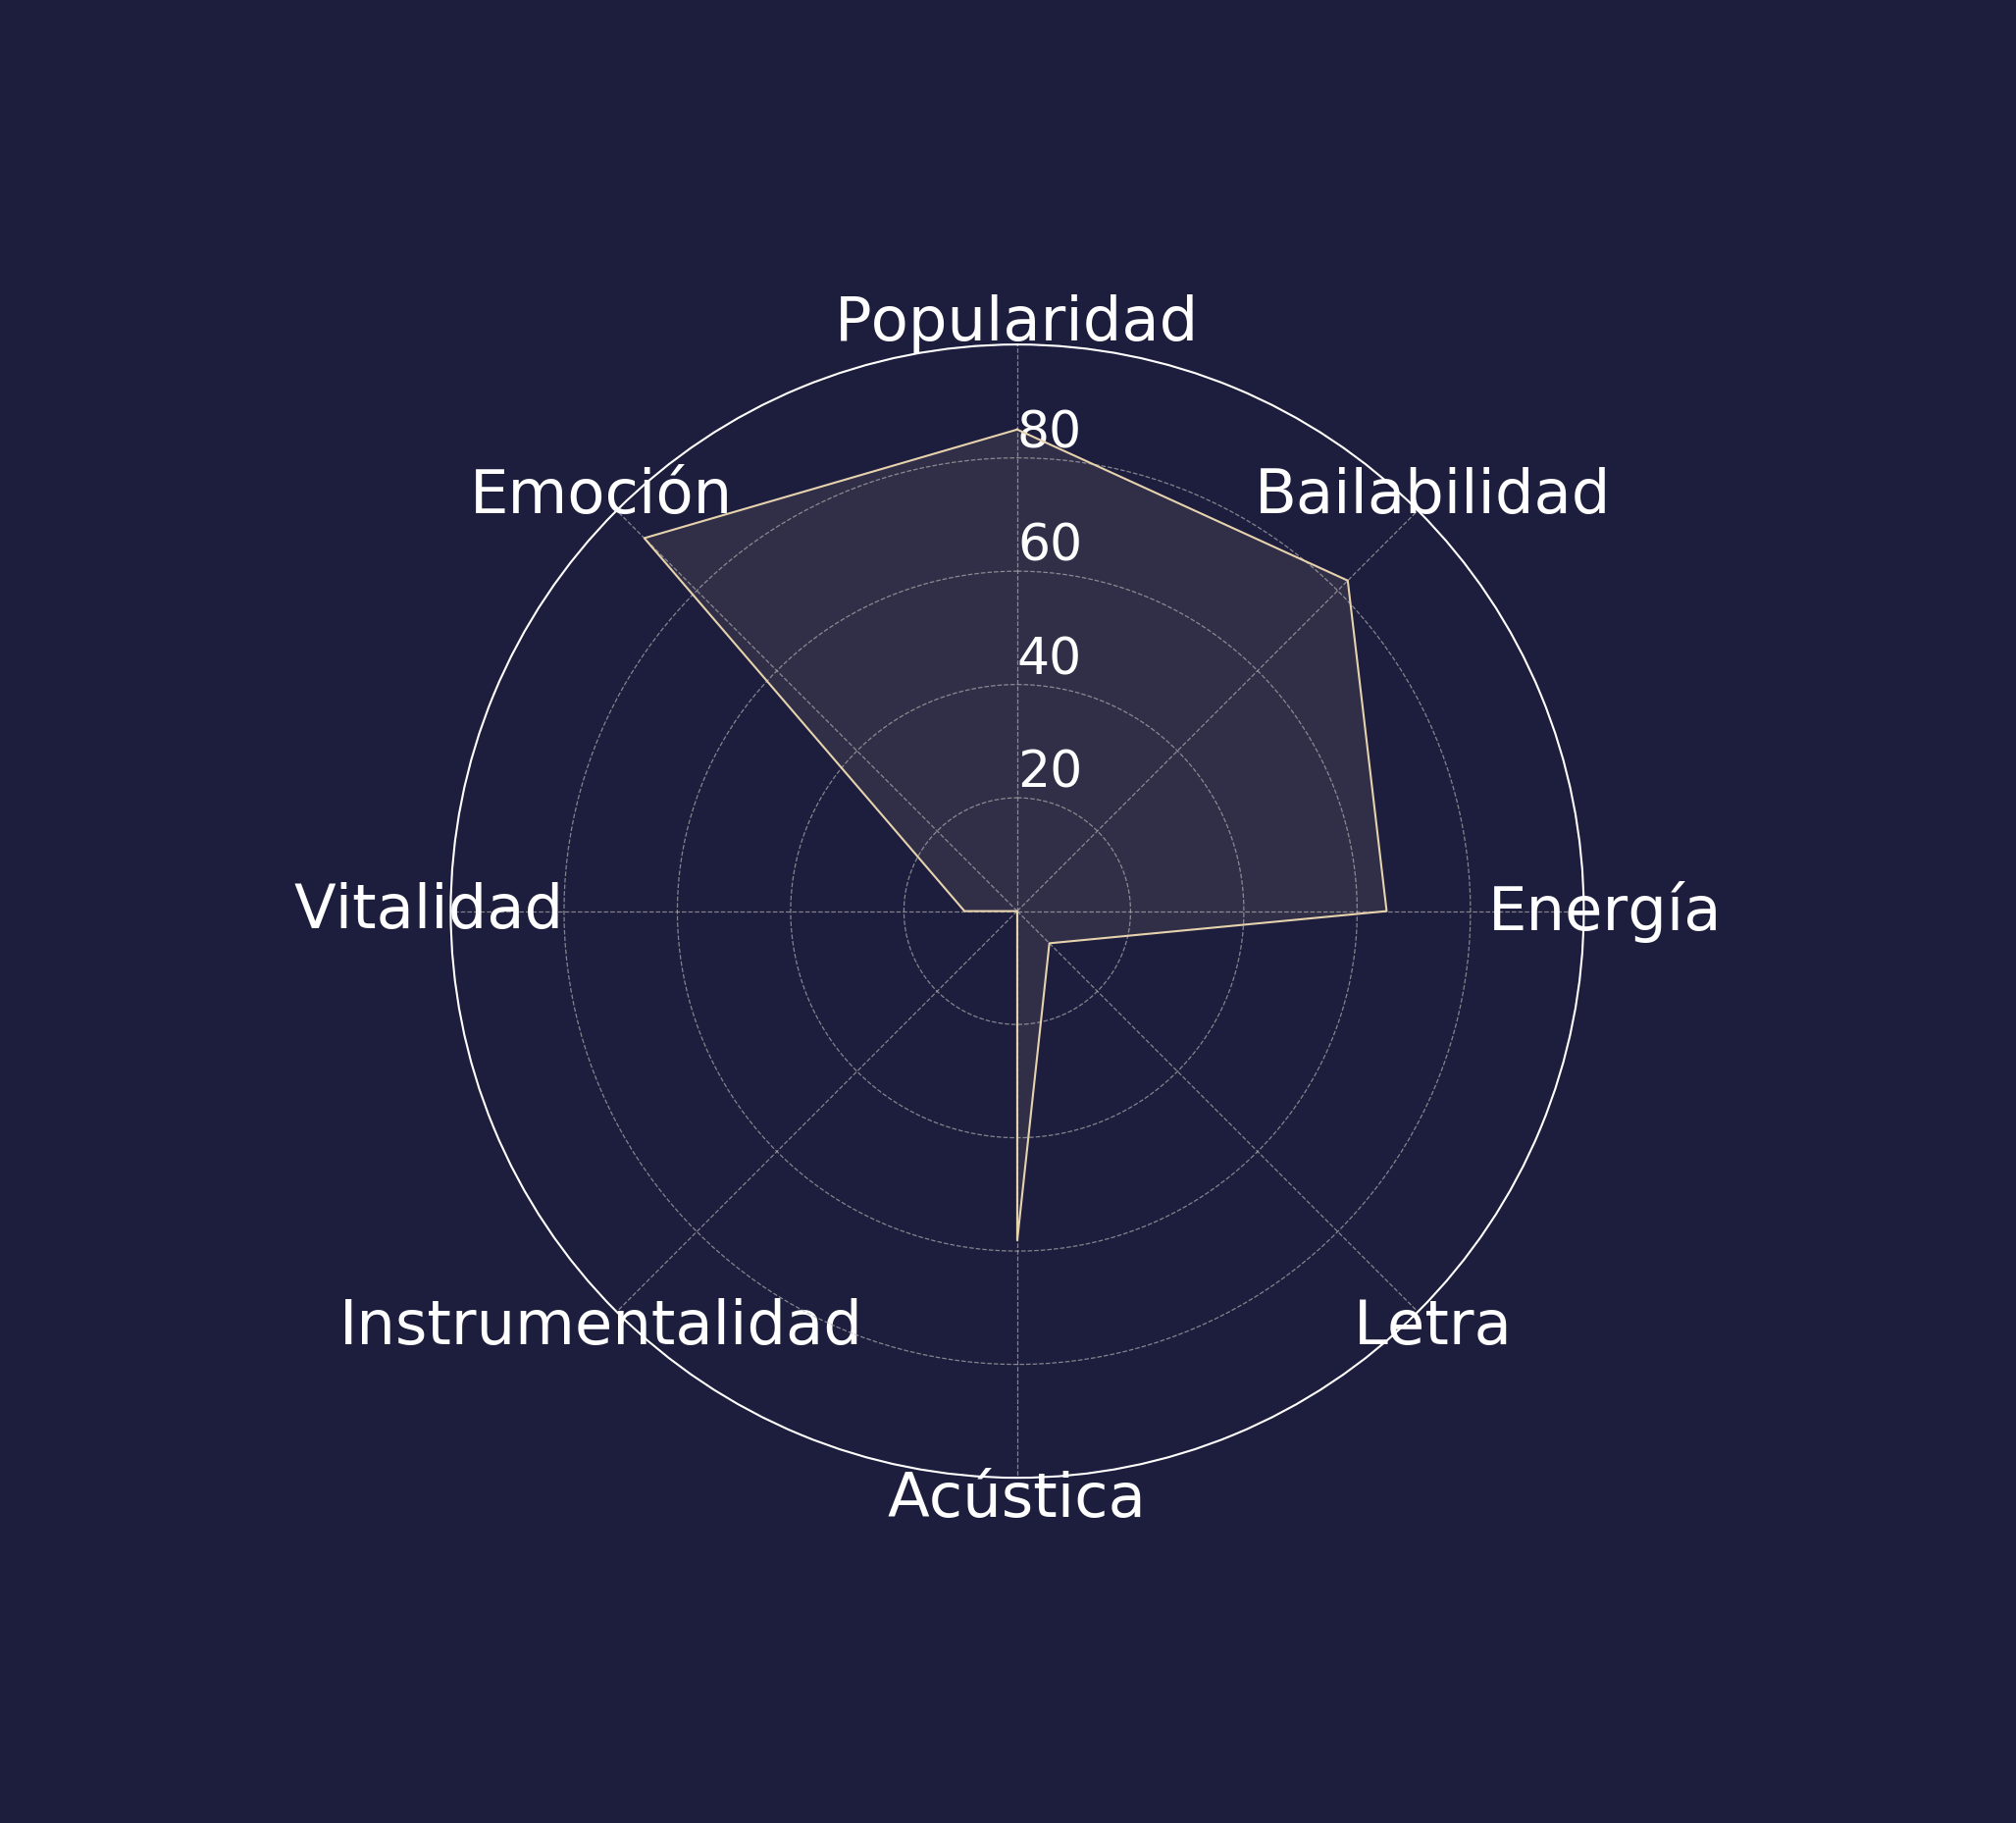

Happy - From "Despicable Me 2"


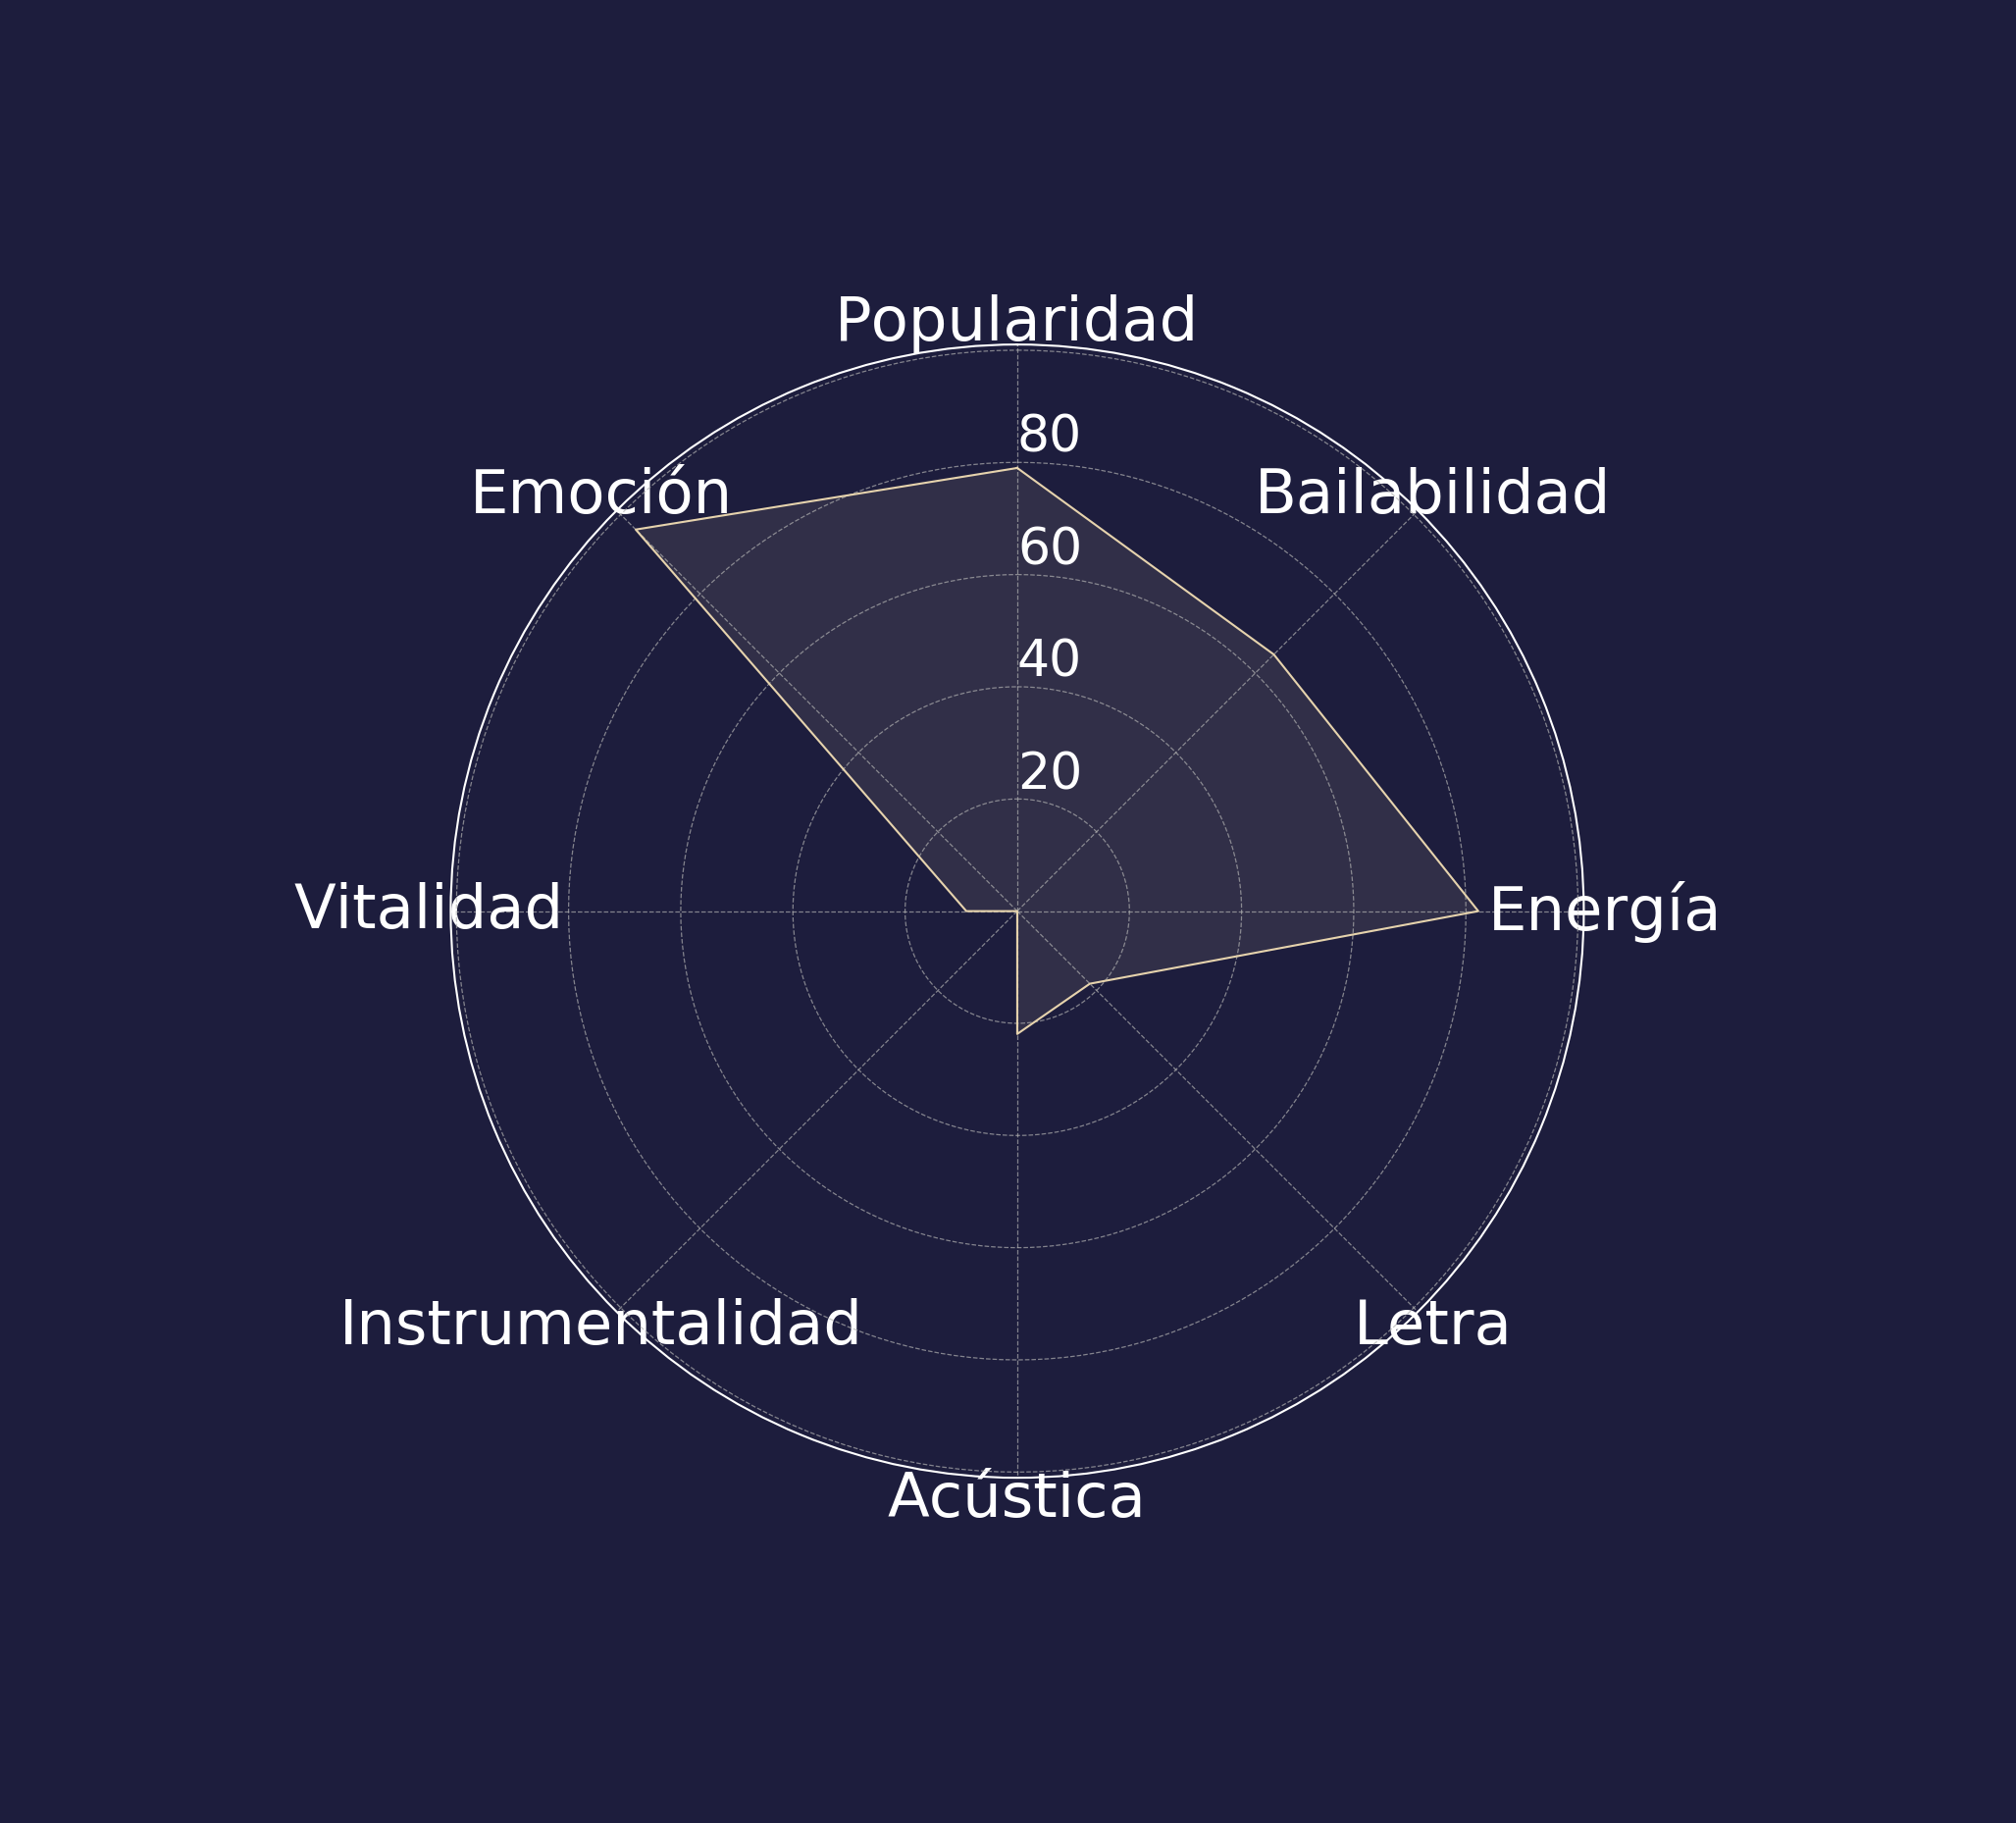

Over the Rainbow


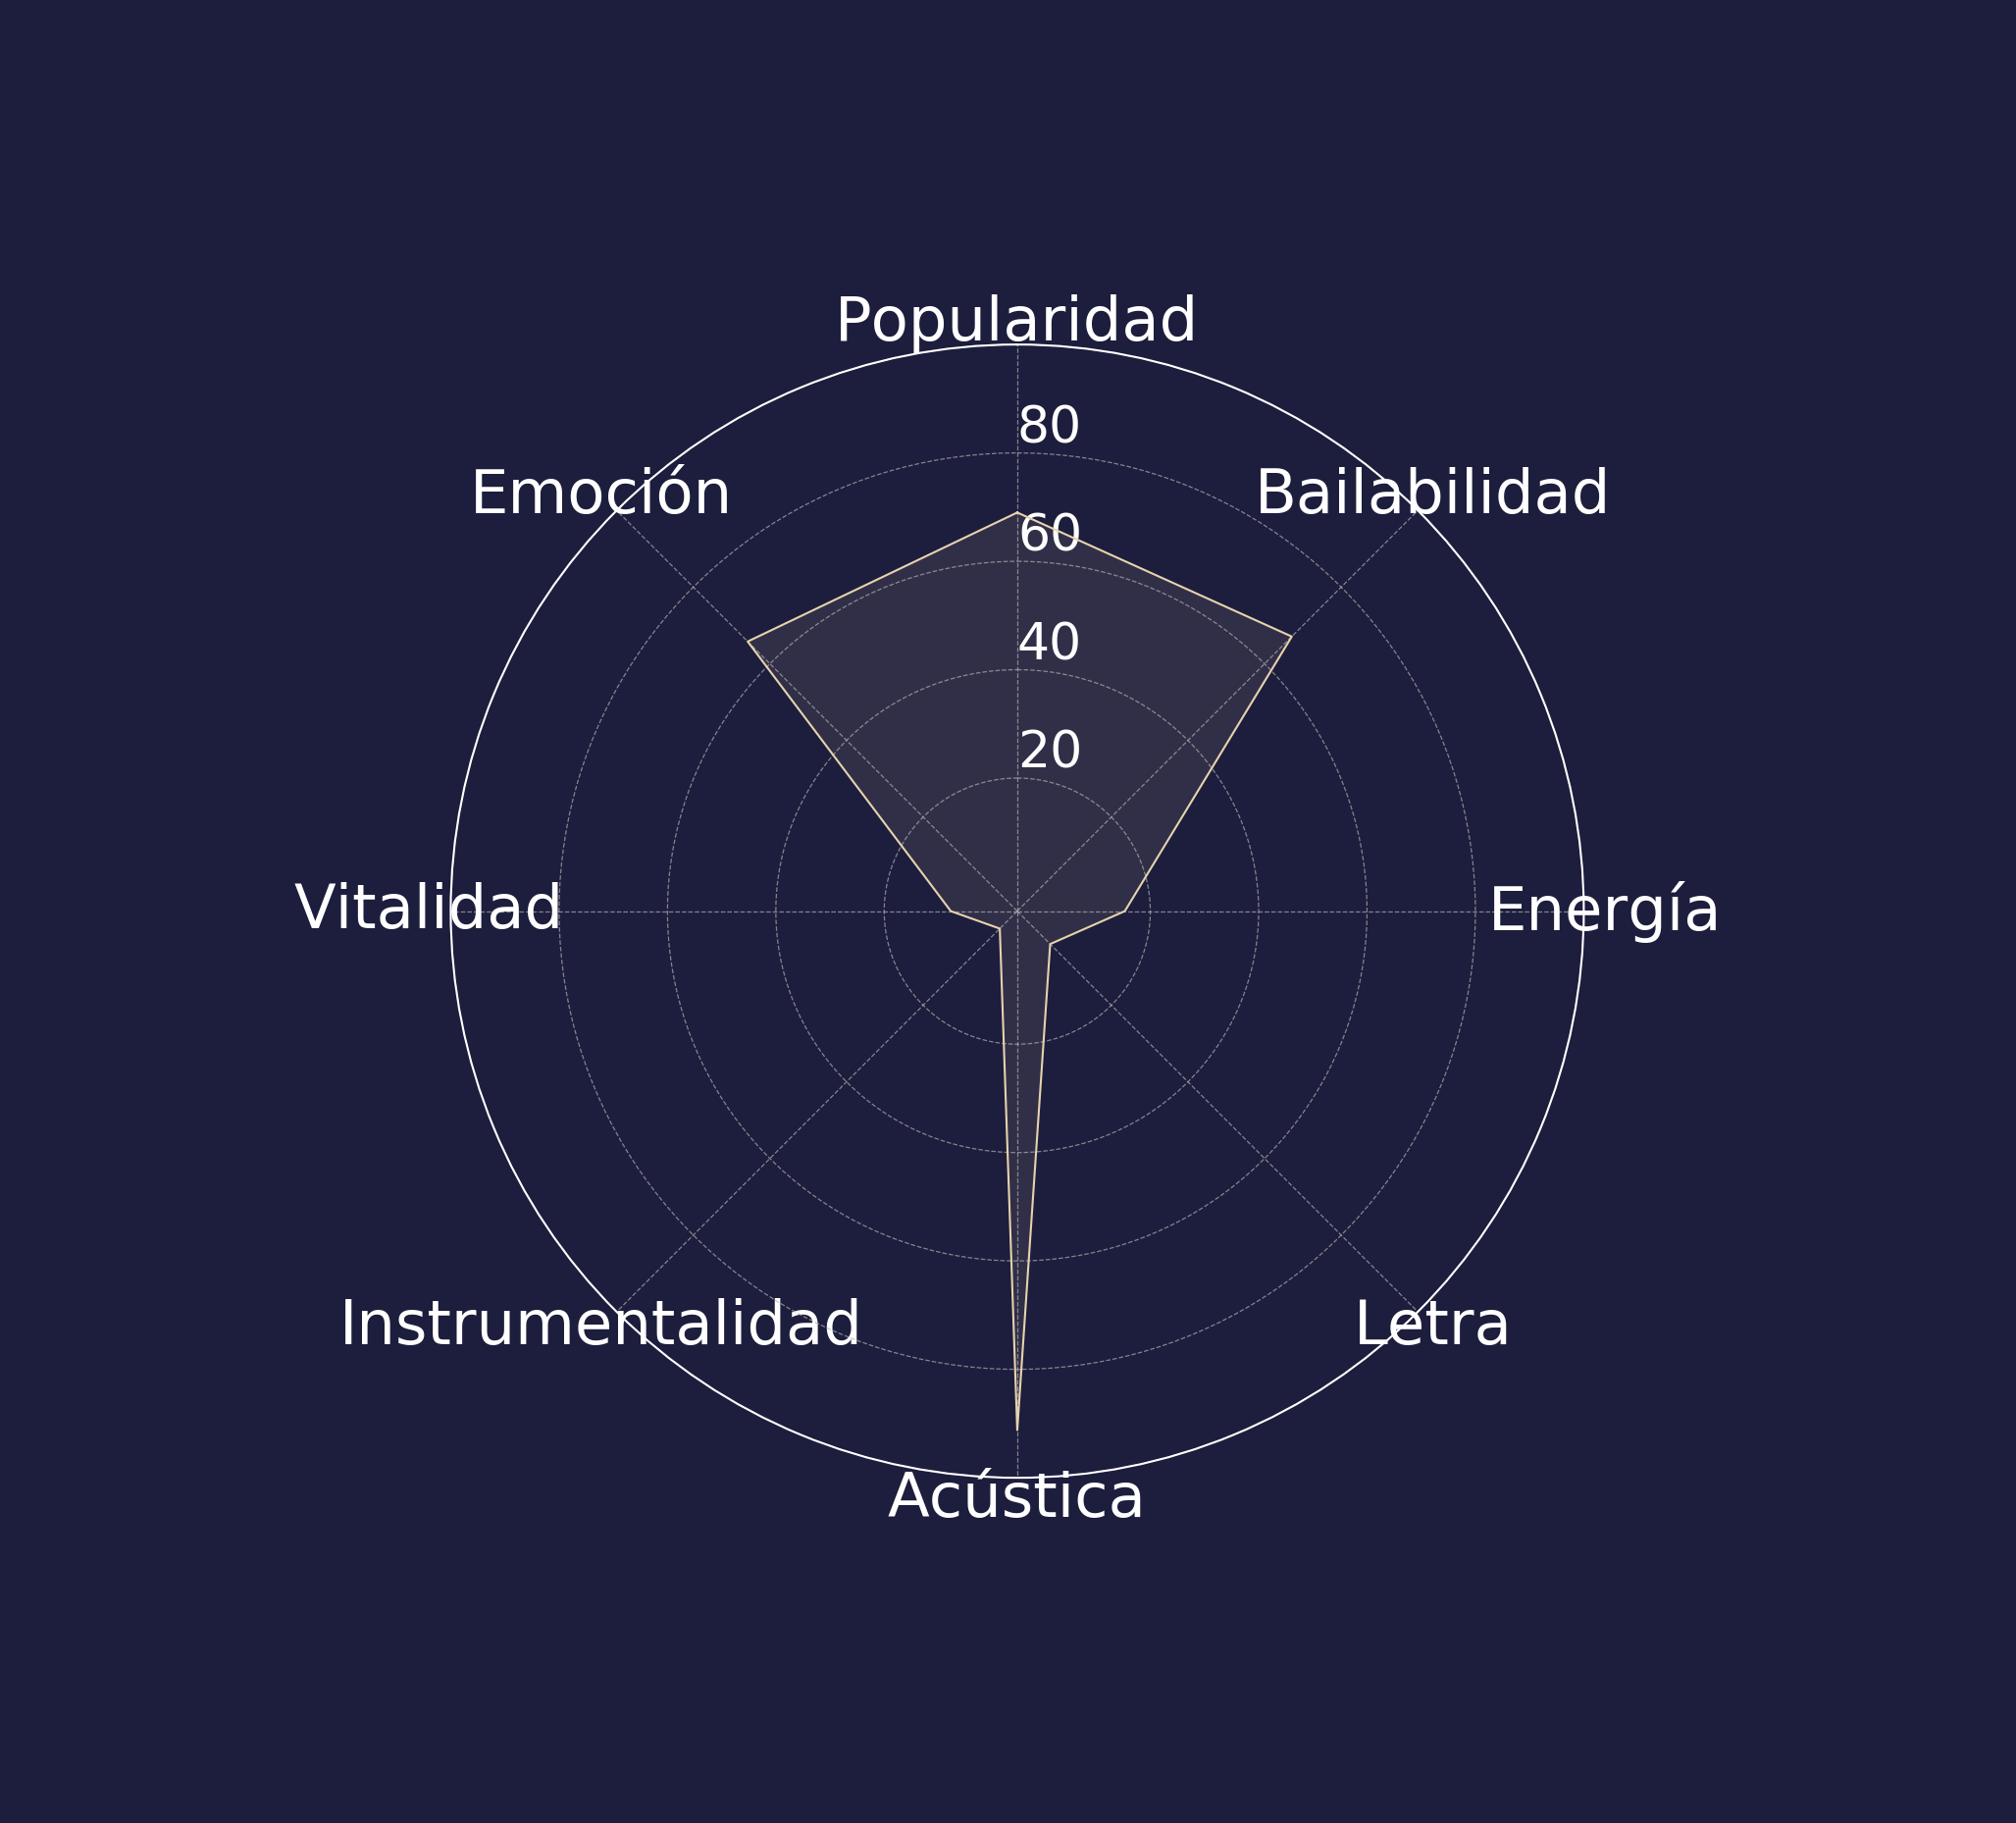

In [6]:
categories = ['Popularidad',
              'Bailabilidad',
              'Energía',
              'Letra',
              'Acústica',
              'Instrumentalidad',
              'Vitalidad',
              'Emoción']


N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

 
for index, r in df.iterrows():
    row = r[categories]
    print(r["name"])
    ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    values = row.values.tolist()
    values.append(values[0])
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
    ax.fill(angles, values, "#E6D3AD", alpha=0.1)
    ax.tick_params(axis='both', which='major', labelsize=30)
    plt.yticks([20,40,60,80, 100], ["20","40","60","80", ""], color="white", size=25)
    plt.savefig(f'{r["name"]}.png',bbox_inches='tight', transparent="True", pad_inches = 0)
    plt.show()